# 线性模型

## 线性回归

In [1]:
import torch

In [2]:
x_data = torch.randn((100, 1))
y_data = torch.randn((100, 1)) + x_data * 7
x_data.shape, y_data.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [3]:
# 构建线性模型
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()  # 使用super魔法函数是为了在子类（存在init的情况）可以使用基类的init
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, X):
        y_pred = self.linear(X)
        return y_pred

In [4]:
net = LinearModel()
criterion = torch.nn.MSELoss(size_average=True)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

D:\IDE_sources\Ancona\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [5]:
# 进行迭代训练
for i in range(100):
    y_pred = net(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:loss=", loss.item())
    optimizer.zero_grad()  # 由于pytorch特性。每一轮的迭代都因该将其置于零
    loss.backward()
    optimizer.step()
print("w=", net.linear.weight)
print("b=", net.linear.bias)

epoch:loss= 43.5496711730957
epoch:loss= 41.74754333496094
epoch:loss= 40.0214958190918
epoch:loss= 38.36830139160156
epoch:loss= 36.78489303588867
epoch:loss= 35.268306732177734
epoch:loss= 33.815731048583984
epoch:loss= 32.4244499206543
epoch:loss= 31.09188461303711
epoch:loss= 29.8155460357666
epoch:loss= 28.593059539794922
epoch:loss= 27.42214584350586
epoch:loss= 26.30063247680664
epoch:loss= 25.226430892944336
epoch:loss= 24.197538375854492
epoch:loss= 23.21204376220703
epoch:loss= 22.268115997314453
epoch:loss= 21.363994598388672
epoch:loss= 20.497997283935547
epoch:loss= 19.668521881103516
epoch:loss= 18.874019622802734
epoch:loss= 18.113014221191406
epoch:loss= 17.384096145629883
epoch:loss= 16.68590545654297
epoch:loss= 16.01714324951172
epoch:loss= 15.376572608947754
epoch:loss= 14.762999534606934
epoch:loss= 14.175285339355469
epoch:loss= 13.612340927124023
epoch:loss= 13.07311725616455
epoch:loss= 12.556615829467773
epoch:loss= 12.061875343322754
epoch:loss= 11.58797931671

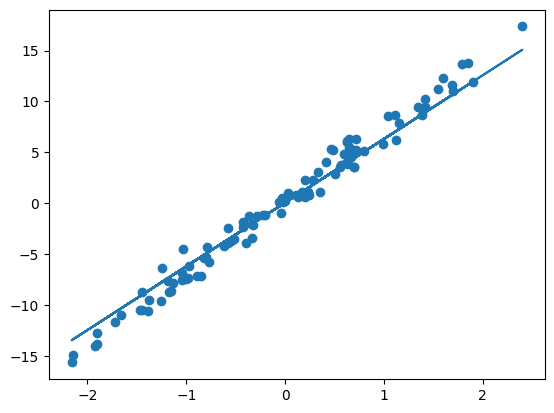

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)
plt.plot(x_data, net.linear.weight.item() * x_data + net.linear.bias.item())

In [7]:
net(torch.Tensor([5.0]))

tensor([31.3164], grad_fn=<AddBackward0>)

## 逻辑斯蒂回归

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch.nn import functional as F

In [9]:
# 进行二分类
# 1.生成数据集
x_data1 = torch.rand(100, 1)
y_data1 = np.random.randint(0, 2, 100)
y_data1 = torch.Tensor(y_data).reshape(100, 1)
x_data1.shape, y_data1.shape, x_data1[:10, :], y_data1[:10, :]
# x_data1=torch.Tensor([[1.],[2.],[3.]])
# y_data1=torch.Tensor([[0.],[0.],[1.]])

(torch.Size([100, 1]),
 torch.Size([100, 1]),
 tensor([[0.3095],
         [0.1828],
         [0.5237],
         [0.3561],
         [0.1112],
         [0.9211],
         [0.5172],
         [0.8485],
         [0.8446],
         [0.2406]]),
 tensor([[  3.6178],
         [  0.9768],
         [ 13.7376],
         [ -7.3697],
         [-10.5283],
         [-15.6004],
         [ -5.7658],
         [  5.7898],
         [  3.9932],
         [ -3.3899]]))

In [10]:
# 2.建立模型（逻辑斯蒂回归）
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, X):
        y_pred = F.sigmoid(self.linear(X))  # 采用sigmoid进行二分类
        return y_pred

In [11]:
# 3.计算损失和优化
model = LogisticRegressionModel()
criterion = torch.nn.BCELoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 超参数学习率

D:\IDE_sources\Ancona\envs\pytorch\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


min_loss= -0.3488417863845825


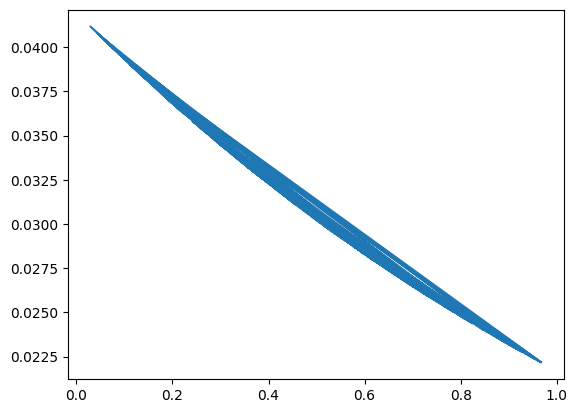

In [12]:
# 4.迭代训练
for epoch in range(1000):
    y_pred1 = model(x_data1)
    loss = criterion(y_pred1, y_data1)

    optimizer.zero_grad()  # 梯度归零
    loss.backward()  # 反向传播
    optimizer.step()  # 梯度下降
print("min_loss=", loss.item())
plt.plot(x_data1, y_pred1.data.numpy())

D:\IDE_sources\Ancona\envs\pytorch\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


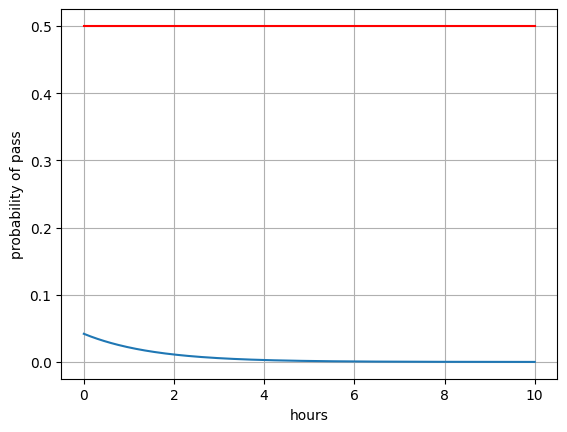

In [13]:
# 5.进行验证
x_t = np.linspace(0, 10, 200)
x = torch.Tensor(x_t).reshape(200, 1)
y = model(x)
y_t = y.data.numpy()
plt.plot(x_t, y_t)
plt.plot([0, 10], [0.5, 0.5], c="r")
plt.xlabel("hours")
plt.ylabel("probability of pass")
plt.grid()
plt.show()

In [15]:
# 1.数据加载的类
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=",", dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

# 数据加载和预处理

In [14]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

In [19]:
# 2.进行数据加载和处理
dataset = DiabetesDataset("/code/jupyter_code/深度学习/data/diabetes.csv.gz")
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0)

In [20]:
# 3.模型建立
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, X):
        X = self.sigmoid(self.linear1(X))
        X = self.sigmoid(self.linear2(X))
        X = self.sigmoid(self.linear3(X))
        return X


model = Model()

In [21]:
# 4.计算损失和优化
criterion = torch.nn.BCELoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=0.9)

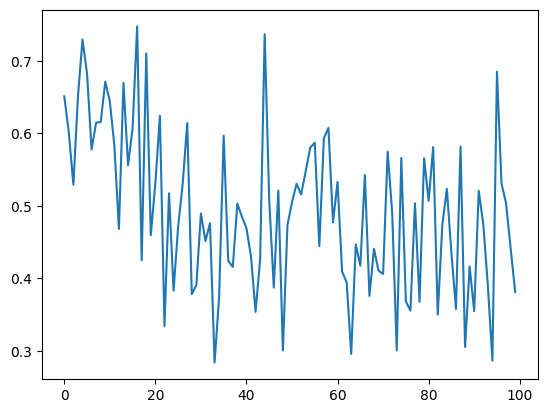

In [22]:
# 3.进行数据训练
loss_data = []
for epoch in range(100):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        #       print(epoch,loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #     print(loss)
    loss_data.append(loss.item())
plt.plot(np.arange(len(loss_data)), np.array(loss_data))

# 多层感知机处理多分类问题

In [23]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [24]:
# 1.加载数据
batch_size = 64
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)
train_data = datasets.MNIST(
    root="../dataset//minset/", train=True, download=True, transform=transform
)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_data = datasets.MNIST(
    root="../dataset//minset/", train=False, download=True, transform=transform
)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../dataset//minset/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../dataset//minset/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ))

In [25]:
# 2.建立模型(多层感知机)
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(784, 512)
        self.linear2 = torch.nn.Linear(512, 256)
        self.linear3 = torch.nn.Linear(256, 128)
        self.linear4 = torch.nn.Linear(128, 64)
        self.linear5 = torch.nn.Linear(64, 10)

    def forward(self, X):
        X = X.reshape(-1, 784)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = F.relu(self.linear3(X))
        X = F.relu(self.linear4(X))
        X = F.relu(self.linear5(X))
        return X


net = MLP()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

MLP(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=10, bias=True)
)

In [26]:
# 3.进行损失的优化
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.5)

In [27]:
# 4.进行模型训练和测试的封装
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        """
        采用GPU进行训练
        """
        inputs, target = inputs.to(device), target.to(device)
        y_pred = net(inputs)
        loss = criterion(y_pred, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print("[%d,%5d] loss: %3f" % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0.0


def test():
    correct = 0.0
    total = 0.0
    with torch.no_grad():  # 下面的内容不用计算梯度
        for data in test_loader:
            images, labels = data
            """
            采用GPU进行训练
            """
            images, labels = images.to(device), labels.to(device)
            outputs = net(
                images,
            )
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print("accuracy on test set:%d,%%" % (100 * correct / total))

In [28]:
for epoch in range(10):
    train(epoch)
    test()

[1,  300] loss: 0.972227
[1,  600] loss: 0.452338
[1,  900] loss: 0.408069
accuracy on test set:85,%
[2,  300] loss: 0.370287
[2,  600] loss: 0.358953
[2,  900] loss: 0.347831
accuracy on test set:85,%
[3,  300] loss: 0.328051
[3,  600] loss: 0.321097
[3,  900] loss: 0.267922
accuracy on test set:96,%
[4,  300] loss: 0.053911
[4,  600] loss: 0.048391
[4,  900] loss: 0.054948
accuracy on test set:97,%
[5,  300] loss: 0.043210
[5,  600] loss: 0.041724
[5,  900] loss: 0.038033
accuracy on test set:97,%
[6,  300] loss: 0.025337
[6,  600] loss: 0.029702
[6,  900] loss: 0.032213
accuracy on test set:97,%
[7,  300] loss: 0.019021
[7,  600] loss: 0.026501
[7,  900] loss: 0.025072
accuracy on test set:97,%
[8,  300] loss: 0.016283
[8,  600] loss: 0.019330
[8,  900] loss: 0.021349
accuracy on test set:98,%
[9,  300] loss: 0.012860
[9,  600] loss: 0.010002
[9,  900] loss: 0.021695
accuracy on test set:98,%
[10,  300] loss: 0.010931
[10,  600] loss: 0.012412
[10,  900] loss: 0.017848
accuracy on t

# 卷积神经网络

## 卷积神经网络

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 数据预处理

In [2]:
# 定义超参数 
input_size = 28  #图像的总尺寸28*28
num_classes = 10  #标签的种类数
num_epochs = 3  #训练的总循环周期
batch_size = 64  #一个撮（批次）的大小，64张图片

# 训练集
train_dataset = datasets.MNIST(root='./data',  
                            train=True,   
                            transform=transforms.ToTensor(),  
                            download=True) 

# 测试集
test_dataset = datasets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# 构建batch数据
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

### 网络结构

In [ ]:
# 一般卷积层，relu层，池化层可以写成一个套餐
# 注意卷积最后结果还是一个特征图，需要把图转换成向量才能做分类或者回归任务

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # 输入大小 (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # 灰度图
                out_channels=16,            # 要得到几多少个特征图
                kernel_size=5,              # 卷积核大小
                stride=1,                   # 步长
                padding=2,                  # 如果希望卷积后大小跟原来一样，需要设置padding=(kernel_size-1)/2 if stride=1
            ),                              # 输出的特征图为 (16, 28, 28)
            nn.ReLU(),                      # relu层
            nn.MaxPool2d(kernel_size=2),    # 进行池化操作（2x2 区域）, 输出结果为： (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # 下一个套餐的输入 (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # 输出 (32, 14, 14)
            nn.ReLU(),                      # relu层
            nn.MaxPool2d(2),                # 输出 (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # 全连接层得到的结果

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten操作，结果为：(batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

### 损失函数

In [4]:
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1] 
    rights = pred.eq(labels.data.view_as(pred)).sum() 
    return rights, len(labels) 

### 训练网络

In [5]:
# 实例化
net = CNN() 
#损失函数
criterion = nn.CrossEntropyLoss() 
#优化器
optimizer = optim.Adam(net.parameters(), lr=0.001) #定义优化器，普通的随机梯度下降算法

#开始训练循环
for epoch in range(num_epochs):
    #当前epoch的结果保存下来
    train_rights = [] 
    
    for batch_idx, (data, target) in enumerate(train_loader):  #针对容器中的每一个批进行循环
        net.train()                             
        output = net(data) 
        loss = criterion(output, target) 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        right = accuracy(output, target) 
        train_rights.append(right) 

    
        if batch_idx % 100 == 0: 
            
            net.eval() 
            val_rights = [] 
            
            for (data, target) in test_loader:
                output = net(data) 
                right = accuracy(output, target) 
                val_rights.append(right)
                
            #准确率计算
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))

            print('当前epoch: {} [{}/{} ({:.0f}%)]\t损失: {:.6f}\t训练集准确率: {:.2f}%\t测试集正确率: {:.2f}%'.format(
                epoch, batch_idx * batch_size, len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.data, 
                100. * train_r[0].numpy() / train_r[1], 
                100. * val_r[0].numpy() / val_r[1]))

当前epoch: 0 [0/60000 (0%)]	损失: 2.315792	训练集准确率: 12.50%	测试集正确率: 17.90%
当前epoch: 0 [6400/60000 (11%)]	损失: 0.291136	训练集准确率: 76.75%	测试集正确率: 91.43%
当前epoch: 0 [12800/60000 (21%)]	损失: 0.107713	训练集准确率: 84.83%	测试集正确率: 95.24%
当前epoch: 0 [19200/60000 (32%)]	损失: 0.041997	训练集准确率: 88.37%	测试集正确率: 96.37%
当前epoch: 0 [25600/60000 (43%)]	损失: 0.122819	训练集准确率: 90.33%	测试集正确率: 97.32%
当前epoch: 0 [32000/60000 (53%)]	损失: 0.046743	训练集准确率: 91.64%	测试集正确率: 97.57%
当前epoch: 0 [38400/60000 (64%)]	损失: 0.082312	训练集准确率: 92.64%	测试集正确率: 97.78%
当前epoch: 0 [44800/60000 (75%)]	损失: 0.043947	训练集准确率: 93.36%	测试集正确率: 98.00%
当前epoch: 0 [51200/60000 (85%)]	损失: 0.168375	训练集准确率: 93.89%	测试集正确率: 98.00%
当前epoch: 0 [57600/60000 (96%)]	损失: 0.035198	训练集准确率: 94.30%	测试集正确率: 98.30%
当前epoch: 1 [0/60000 (0%)]	损失: 0.036921	训练集准确率: 100.00%	测试集正确率: 98.02%
当前epoch: 1 [6400/60000 (11%)]	损失: 0.013579	训练集准确率: 98.02%	测试集正确率: 98.42%
当前epoch: 1 [12800/60000 (21%)]	损失: 0.026426	训练集准确率: 98.13%	测试集正确率: 98.27%
当前epoch: 1 [19200/60000 (32%)]	损失: 0.067841	训练集准确

## GoolgNet

In [30]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [31]:
# 1.加载数据
batch_size = 64
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)
train_data = datasets.MNIST(
    root="../dataset//minset/", train=True, download=True, transform=transform
)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_data = datasets.MNIST(
    root="../dataset//minset/", train=False, download=True, transform=transform
)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

torch.Size([64])
torch.Size([64, 1, 28, 28])


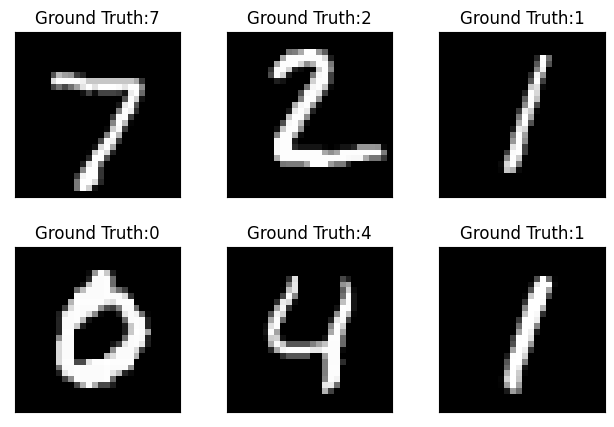

In [32]:
# 读取标签数据
examples = enumerate(test_loader)
batch_idx, (imgs, labels) = next(examples)
print(labels.shape)
print(imgs.shape)

# 显示图片
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(imgs[i][0], cmap="gray")
    plt.title("Ground Truth:{}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [34]:
# 2.构建Inception块
class InceptionA(torch.nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch_pool = torch.nn.Conv2d(in_channels, 24, kernel_size=1)

        self.branch1x1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = torch.nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3_1 = torch.nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3_2 = torch.nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3_3 = torch.nn.Conv2d(24, 24, kernel_size=3, padding=1)

    def forward(self, X):

        branch1x1 = self.branch1x1(X)

        branch5x5 = self.branch5x5_1(X)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3 = self.branch3x3_1(X)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)

        branch_pool = F.avg_pool2d(X, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch5x5, branch_pool]
        return torch.cat(outputs, dim=1)

In [35]:
# 3.构建goolglet网络模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cov_1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.incep_1 = InceptionA(in_channels=10)

        self.cov_2 = torch.nn.Conv2d(88, 20, kernel_size=5)
        self.incep_2 = InceptionA(in_channels=20)

        self.mp = torch.nn.MaxPool2d(2)
        self.linear = torch.nn.Linear(1408, 10)

    def forward(self, X):
        in_size = X.size(0)
        X = F.relu(self.mp(self.cov_1(X)))
        X = self.incep_1(X)
        X = F.relu(self.mp(self.cov_2(X)))
        X = self.incep_2(X)
        X = X.view(in_size, -1)

        X = self.linear(X)
        return X


net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)  # 将网络初始化权重转移到GPU

In [36]:
# 4.计算损失和优化
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [37]:
# 5.进行模型训练和测试的封装
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        # 采用GPU进行训练
        inputs, target = inputs.to(device), target.to(device)  # 将训练数据转移到GPU
        y_pred = net(inputs)
        loss = criterion(y_pred, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print("[%d,%5d] loss: %3f" % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0.0


def test():
    correct = 0.0
    total = 0.0
    with torch.no_grad():  # 下面的内容不用计算梯度
        for data in test_loader:
            images, labels = data
            # 采用GPU进行训练
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print("accuracy on test set:%d,%%" % (100 * correct / total))

In [ ]:
if __name__ == "__main__":
    for epoch in range(10):
        train(epoch)
        test()

[1,  300] loss: 0.896460
[1,  600] loss: 0.208641
[1,  900] loss: 0.152148
accuracy on test set:96,%
[2,  300] loss: 0.111383
[2,  600] loss: 0.102170
[2,  900] loss: 0.080230
accuracy on test set:97,%
[3,  300] loss: 0.073917
[3,  600] loss: 0.073975
[3,  900] loss: 0.071088
accuracy on test set:98,%
[4,  300] loss: 0.061556
[4,  600] loss: 0.062025
[4,  900] loss: 0.058036
accuracy on test set:98,%
[5,  300] loss: 0.053738
[5,  600] loss: 0.054886
[5,  900] loss: 0.048639
accuracy on test set:98,%
[6,  300] loss: 0.041496
[6,  600] loss: 0.052522
[6,  900] loss: 0.047715
accuracy on test set:98,%
[7,  300] loss: 0.042943
[7,  600] loss: 0.040486
[7,  900] loss: 0.043877
accuracy on test set:98,%
[8,  300] loss: 0.038911
[8,  600] loss: 0.039230
[8,  900] loss: 0.038267
accuracy on test set:98,%
[9,  300] loss: 0.032356
[9,  600] loss: 0.035886
[9,  900] loss: 0.037504
accuracy on test set:98,%
[10,  300] loss: 0.033322
[10,  600] loss: 0.033027


# 循环神经网络

In [29]:
import numpy as np
import torch
import torch.nn as nn

In [63]:
# 1.准备数据
input_size = 4
hidden_size = 4
batch_size = 1
num_layer = 2  # 增加RNN的层数
idx2char = ["e", "l", "h", "o"]
x_data = [1, 0, 2, 2, 3]
y_data = [3, 1, 2, 3, 2]
one_hot_lookup = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
x_one_hot = [one_hot_lookup[x] for x in x_data]
inputs = torch.Tensor(x_one_hot).view(-1, batch_size, input_size)
labels = torch.LongTensor(y_data)

In [64]:
# 2.建立RNN模型
class RNNmodel(nn.Module):
    def __init__(self, input_size, hidden_size, batch_size, num_layer):
        super(RNNmodel, self).__init__()
        self.num_layer = num_layer
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(
            input_size=self.input_size,
            hidden_size=self.hidden_size,
            num_layers=self.num_layer,
        )

    #     def forward(self,input,hidden):
    #         hidden=self.RNNcell(input,hidden)
    #         return hidden

    #     def init_hidden(self):
    #         return torch.zeros(self.batch_size,self.hidden_size)

    def forward(self, input):
        hidden = torch.zeros(self.num_layer, self.batch_size, self.hidden_size)
        out, _ = self.rnn(input, hidden)
        return out.view(-1, self.hidden_size)


net = RNNmodel(input_size, hidden_size, batch_size, num_layer)

In [65]:
# 3.损失和优化
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

In [66]:
# 4.进行训练
for epoch in range(15):
    loss = 0.0
    optimizer.zero_grad()

    #     hidden=net.init_hidden()
    #     print('predicted string:',end="")
    #     for input,label in zip(inputs,labels):
    #         hidden=net(input,hidden)
    #         loss += criterion(hidden,label)
    #         _,idx=hidden.max(dim=1)
    #         print(idx2char[idx.item()],end='')

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print("predicted:", "".join(idx2char[x] for x in idx), end="")
    print(",epoch[%d/15] loss=%.4f" % (epoch + 1, loss.item()))

predicted: lllll,epoch[1/15] loss=1.4517
predicted: hhhhh,epoch[2/15] loss=1.2386
predicted: hhhhh,epoch[3/15] loss=1.1330
predicted: hhhhh,epoch[4/15] loss=1.0875
predicted: ohooh,epoch[5/15] loss=1.0040
predicted: olooh,epoch[6/15] loss=0.8659
predicted: olooh,epoch[7/15] loss=0.7669
predicted: olool,epoch[8/15] loss=0.7116
predicted: olool,epoch[9/15] loss=0.6557
predicted: olooh,epoch[10/15] loss=0.6135
predicted: olooh,epoch[11/15] loss=0.5831
predicted: olooh,epoch[12/15] loss=0.5594
predicted: olooh,epoch[13/15] loss=0.5437
predicted: olooh,epoch[14/15] loss=0.5320
predicted: olooh,epoch[15/15] loss=0.5202


In [5]:
import csv
import gzip

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

In [6]:
HIDDEN_SIZE = 100
BATCH_SIZE = 256
N_LAYER = 2
N_EPOCH = 100
N_CHARS = 128
USE_GPU = True

In [7]:
# 1.载入数据
# 1.1.创建加载数据的类
class NameDataset(Dataset):
    def __init__(self, is_train_set=True):
        filename = (
            "data/names_train.csv.gz" if is_train_set else "data/names_test.csv.gz"
        )
        with gzip.open(filename, "rt") as f:
            reader = csv.reader(f)
            rows = list(reader)
        self.names = [row[0] for row in rows]
        self.len = len(self.names)
        self.countries = [row[1] for row in rows]
        self.country_list = list(sorted(set(self.countries)))
        self.country_dict = self.getCountryDict()
        self.country_num = len(self.country_list)

    def __getitem__(self, index):
        return self.names[index], self.country_dict[self.countries[index]]

    def __len__(self):
        return self.len

    def getCountryDict(self):
        country_dict = dict()
        for idx, country_name in enumerate(self.country_list, 0):
            country_dict[country_name] = idx
        return country_dict

    def idx2country(self, index):
        return self.country_list[index]

    def getCountriesNum(self):
        return self.country_num


# 1.2.预加载数据
trainset = NameDataset(is_train_set=True)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testset = NameDataset(is_train_set=False)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)
N_COUNTRY = trainset.getCountriesNum()